In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 


import warnings
warnings.filterwarnings('ignore')

In [3]:
company=pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### EDA


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
#Checking Duplicate Values
company[company.duplicated(keep = False)]


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


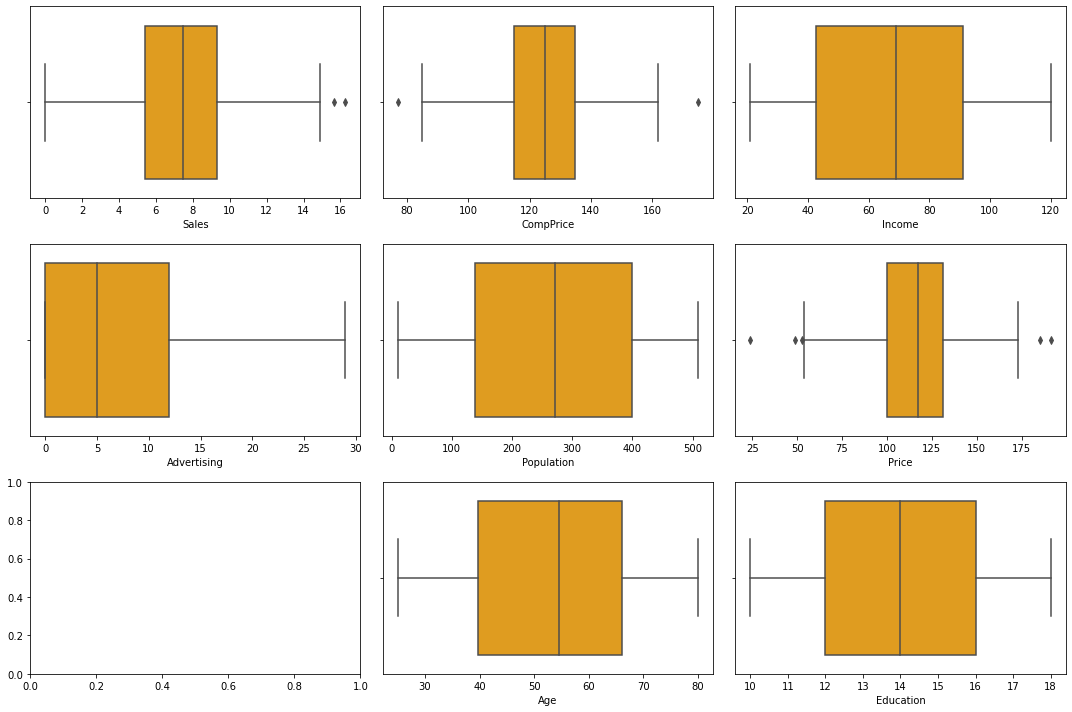

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))
sns.boxplot(company.Sales, ax=ax[0,0],color='orange')
sns.boxplot(company.CompPrice, ax=ax[0,1],color='orange')
sns.boxplot(company.Income, ax=ax[0,2],color='orange')
sns.boxplot(company.Advertising, ax=ax[1,0],color='orange')
sns.boxplot(company.Population, ax=ax[1,1],color='orange')
sns.boxplot(company.Price, ax=ax[1,2],color='orange')
sns.boxplot(company.Age, ax=ax[2,1],color='orange')
sns.boxplot(company.Education, ax=ax[2,2],color='orange')

plt.tight_layout()
plt.show()



Find the average sales and classifying the categories that are greater than the average sales value, as the fast moving product segment


In [8]:
company["sales"]=(company["Sales"]>7.49)*1
company["sales"]

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales, Length: 400, dtype: int32

### Converting all the categorical variable to numerical values using Label encoding


In [9]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 

In [10]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [11]:
company.drop(["Sales"],axis=1,inplace=True)

In [12]:
x=company.iloc[:,0:10]
y=company.iloc[:,10]

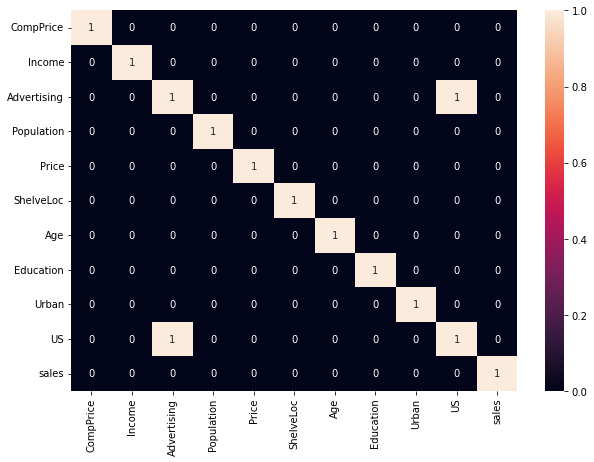

In [13]:
#Checking for correlation of variables using HeatMap
plt.figure(figsize=(10,7))
sns.heatmap(company.corr()>0.6, annot = True)
plt.show()

<AxesSubplot:>

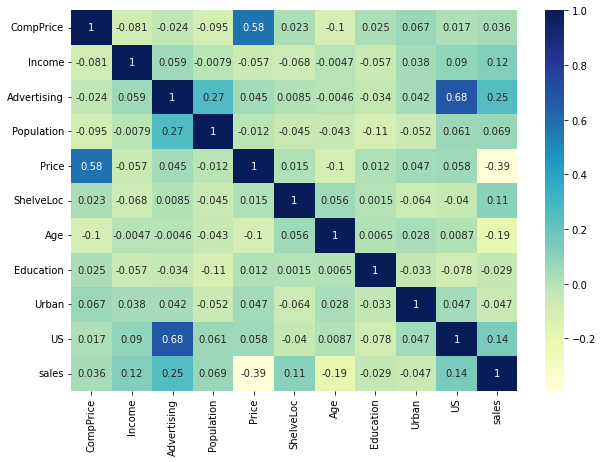

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(company.corr(),cmap="YlGnBu",annot=True)

In [15]:
#Splitting Data into Training and test data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

### Building Decision Tree Classifier using Entropy Criteria 

In [16]:
#Creating a Decision tree classifier model with a depth of 3 and fitting the data on the model
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

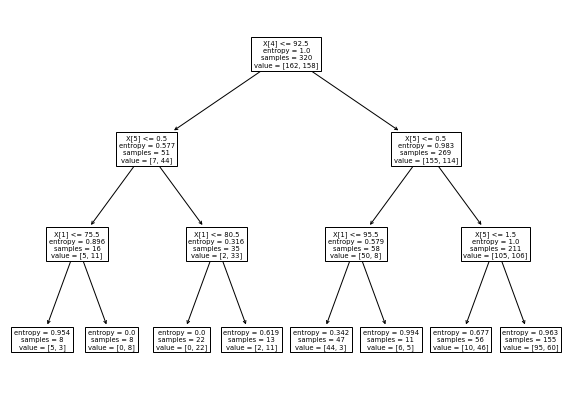

In [17]:
plt.figure(figsize=(10,7))
tree.plot_tree(model);

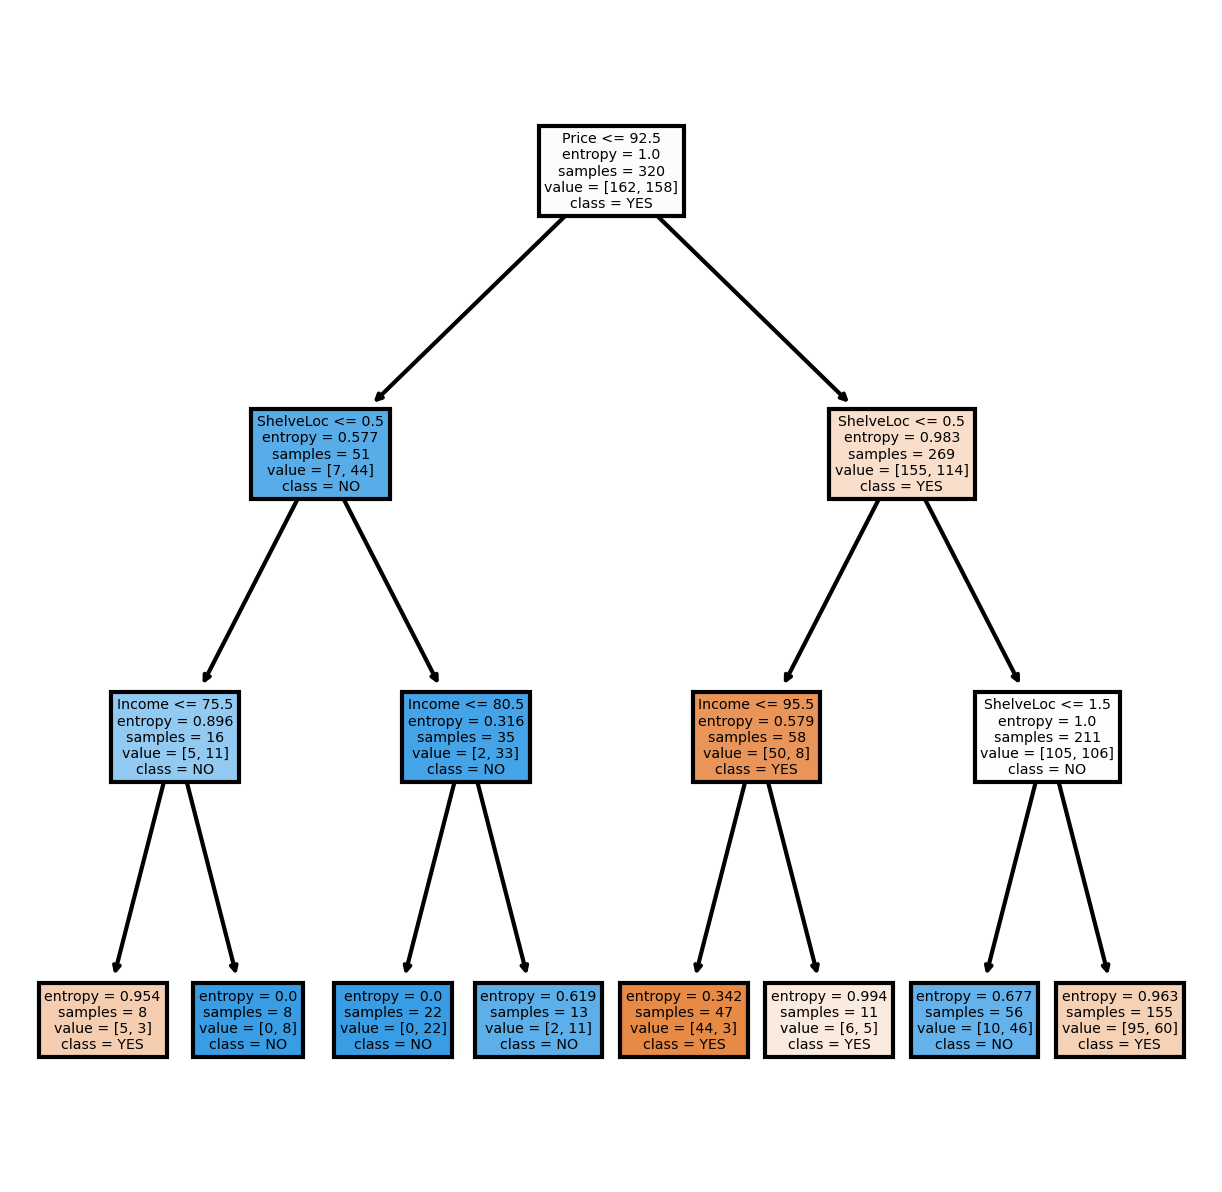

In [18]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [19]:
model.feature_importances_ 

array([0.        , 0.18036831, 0.        , 0.        , 0.28929567,
       0.53033602, 0.        , 0.        , 0.        , 0.        ])

In [20]:
#Checking the score for the training data
model.score(x_train, y_train)

0.740625

In [21]:
feature_imp = pd.Series(model.feature_importances_,).sort_values(ascending=False) 
feature_imp

5    0.530336
4    0.289296
1    0.180368
0    0.000000
2    0.000000
3    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
dtype: float64

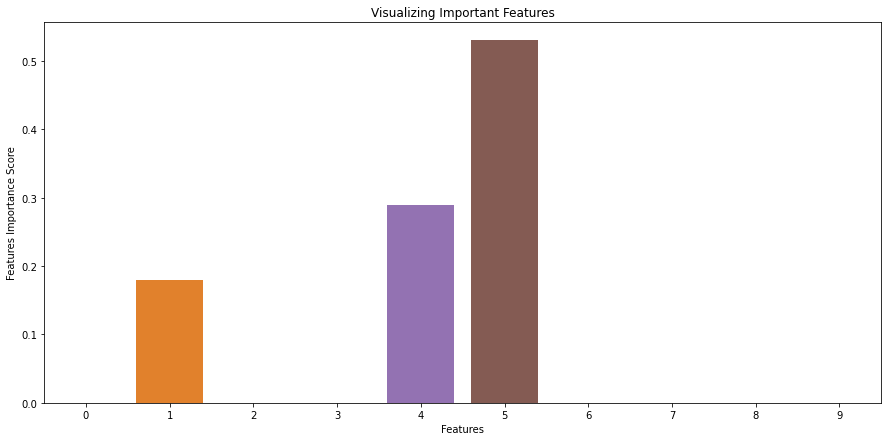

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,7))

sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Visualizing Important Features")
plt.show()

In [23]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    58
1    22
dtype: int64

In [24]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
pd.crosstab(y_test,preds)

col_0,0,1
sales,,
0,36,3
1,22,19


In [26]:
#Accuracy
np.mean(preds==y_test)

0.6875

### Building Decision Tree Classifier (CART) using Gini Criteria

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [28]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [29]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.6875

In [30]:
model.feature_importances_ 

array([0.        , 0.18036831, 0.        , 0.        , 0.28929567,
       0.53033602, 0.        , 0.        , 0.        , 0.        ])

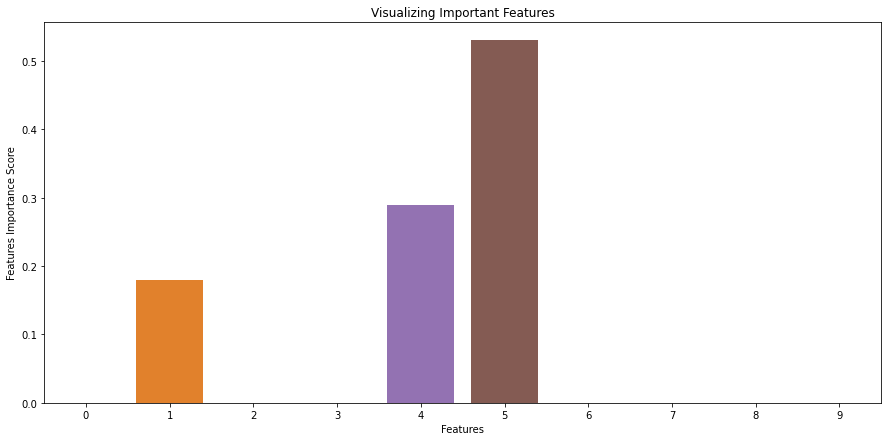

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,7))

sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Visualizing Important Features")
plt.show()

#### Decision Tree Regression Example

In [36]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [37]:
array = company.values
x = array[:,0:10]
y = array[:,10]

In [38]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)# different test size

In [39]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [40]:
model.score(x_test,y_test) 

-0.45122807017543876